In [188]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()  # Enable progress_apply with progress bar in Jupyter environments
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.matutils import Sparse2Corpus
from gensim import models
from scipy.sparse import csr_matrix
import missingno as msno
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm


In [189]:
df = pd.read_excel('/Users/ruimaciel/Desktop/Barcelona/Master_Thesis/ECB_Perceived_Cacophony/combined_updated.xlsx')
df.head(20)

,Date,Source,Headline,Translated.headline,Manual.summary,Original.article.url,Translated.text,Media.type,Speaker,Reach,Language,Country.Code,Sitename,Tags,Site_Readership,Article_Readership
0,2022-09-30 22:08:34,Il Messaggero - Borsa Italiana,"Visco: «Troppi rialzi dei tassi, si va in recessione. Grave errore seguire la Fed»","Banca d'Italia's Visco: ""Too many rate hikes would trigger a recession. Big mistake to follow the Fed""","At a conference in Florence, Banca d'Italia Governor Ignazio Visco warned of the risks of triggering recession if the ECB blindly follows the US Federal Reserve and proceeds with excessively rapid and pronounced rate rises. Mr Visco, however, defended the ECB from the attacks of those who criticised it as slow in recognising the arrival of high inflation in recent months and stressed that he does not see any apparent reason to assume that the upcoming increases will be extraordinarily high. The governor claimed that the ECB had started its journey last December and emphasised that the institution's neutral policy rate would be between 0.7% and 1.8%. Therefore, the ECB could have already reached this rate with its last interest rate increase or is close to reaching it soon.",https://www.ilmessaggero.it/economia/news/tassi_bce_visco_fed-6960546.html,"No to an excessive rise in rates. The Governor of the Bank of Italy, Vincenzo Visco, warns against rapid and pronounced risks >>. After the hail of declarations from the hawks, the Frankfurt leadership in recent days was slow in recognizing the arrival of high inflation in recent months. And the dust of the hawks' front is soaked in the ECB Council: There is no <<obvious reason why Tying Our Hands With Hypotheses of Extraordinarily High Increases Such as Those We Read in Some Parts. A Speech Made Highlighting the Difference Between Europe and the United States which requires a different normalization path. A similar vision is also expressed by the EU Commissioner for Economic Affairs Paolo Gentiloni who calls for fighting inflation ""without killing growth"". For the board of the central bank, a decision will also be made more difficult by the different pace of inflation in European countries, hidden within 10% of the EU figure. If Germany is at 10%, LANDA at 17% and Italy at 8.9%, in Spain prices are rising and so also in France, at +6.2%. In his speech, the Governor claims that the ECB has made its path neither accommodative nor restrictive and that Frankfurt is trying to achieve so as not to further fan the flames of inflation: 'It would be in a range between 0.7 and no rate hike. , orClose to Be Soon >>. Visco's is a clear stop to colleagues who are asking for new sharp increases in GNI. Decision will be made ""based on data"". In the last two days alone, the governors of Austria, Finland, Lithuania and Latvia had pushed the hawkish front in favor of a 75 basis point squeeze in October. IT'S NOT ONLY GROWTH THAT IS VANTI'S TROUBLE FOR FINANCIAL STABILITY>>, the realization of which would have heavy repercussions in all the countries of the euro area, leading to a tightening of financial conditions far greater than what was considered appropriate to contain the high inflation. ""And also for this reason Italy must not abdicate its virtuous path on which Mario Draghi's government has set out: debt reduction. The message, without naming it, is to the new government. Help to combat the energy shock and the expensive bills are possible but only to the most affected companies and families, otherwise the Count will be paid by future generations with the Greater Kingdom.",WEB,Newspapers,1174293,it,IT,Il Messaggero,"European Central Bank, European Monetary Union and Central Banks, Inflation, Rank 1, Christine Lagarde, Core sources, Mandate (price stability), Interest rates, Growth, Isabel Schnabel, Governing Council members",2296944.0,0.0
1,2022-09-30 21:44:15,Puls Biznesu - Z ostatniej chwili,Knot: kolejne podwyżki stóp EBC są konieczne,Knot: further ECB rate

In [190]:
#import plotly.io as pio
#pio.renderers.default = 'notebook'


# PreProcess Scraped Text

In [191]:
df_scraped = pd.read_excel('/Users/ruimaciel/Desktop/Barcelona/Master_Thesis/ECB_Perceived_Cacophony/combined_updated.xlsx')
df_scraped.head(20)

,Date,Source,Headline,Translated.headline,Manual.summary,Original.article.url,Translated.text,Media.type,Speaker,Reach,Language,Country.Code,Sitename,Tags,Site_Readership,Article_Readership
0,2022-09-30 22:08:34,Il Messaggero - Borsa Italiana,"Visco: «Troppi rialzi dei tassi, si va in recessione. Grave errore seguire la Fed»","Banca d'Italia's Visco: ""Too many rate hikes would trigger a recession. Big mistake to follow the Fed""","At a conference in Florence, Banca d'Italia Governor Ignazio Visco warned of the risks of triggering recession if the ECB blindly follows the US Federal Reserve and proceeds with excessively rapid and pronounced rate rises. Mr Visco, however, defended the ECB from the attacks of those who criticised it as slow in recognising the arrival of high inflation in recent months and stressed that he does not see any apparent reason to assume that the upcoming increases will be extraordinarily high. The governor claimed that the ECB had started its journey last December and emphasised that the institution's neutral policy rate would be between 0.7% and 1.8%. Therefore, the ECB could have already reached this rate with its last interest rate increase or is close to reaching it soon.",https://www.ilmessaggero.it/economia/news/tassi_bce_visco_fed-6960546.html,"No to an excessive rise in rates. The Governor of the Bank of Italy, Vincenzo Visco, warns against rapid and pronounced risks >>. After the hail of declarations from the hawks, the Frankfurt leadership in recent days was slow in recognizing the arrival of high inflation in recent months. And the dust of the hawks' front is soaked in the ECB Council: There is no <<obvious reason why Tying Our Hands With Hypotheses of Extraordinarily High Increases Such as Those We Read in Some Parts. A Speech Made Highlighting the Difference Between Europe and the United States which requires a different normalization path. A similar vision is also expressed by the EU Commissioner for Economic Affairs Paolo Gentiloni who calls for fighting inflation ""without killing growth"". For the board of the central bank, a decision will also be made more difficult by the different pace of inflation in European countries, hidden within 10% of the EU figure. If Germany is at 10%, LANDA at 17% and Italy at 8.9%, in Spain prices are rising and so also in France, at +6.2%. In his speech, the Governor claims that the ECB has made its path neither accommodative nor restrictive and that Frankfurt is trying to achieve so as not to further fan the flames of inflation: 'It would be in a range between 0.7 and no rate hike. , orClose to Be Soon >>. Visco's is a clear stop to colleagues who are asking for new sharp increases in GNI. Decision will be made ""based on data"". In the last two days alone, the governors of Austria, Finland, Lithuania and Latvia had pushed the hawkish front in favor of a 75 basis point squeeze in October. IT'S NOT ONLY GROWTH THAT IS VANTI'S TROUBLE FOR FINANCIAL STABILITY>>, the realization of which would have heavy repercussions in all the countries of the euro area, leading to a tightening of financial conditions far greater than what was considered appropriate to contain the high inflation. ""And also for this reason Italy must not abdicate its virtuous path on which Mario Draghi's government has set out: debt reduction. The message, without naming it, is to the new government. Help to combat the energy shock and the expensive bills are possible but only to the most affected companies and families, otherwise the Count will be paid by future generations with the Greater Kingdom.",WEB,Newspapers,1174293,it,IT,Il Messaggero,"European Central Bank, European Monetary Union and Central Banks, Inflation, Rank 1, Christine Lagarde, Core sources, Mandate (price stability), Interest rates, Growth, Isabel Schnabel, Governing Council members",2296944.0,0.0
1,2022-09-30 21:44:15,Puls Biznesu - Z ostatniej chwili,Knot: kolejne podwyżki stóp EBC są konieczne,Knot: further ECB rate

In [192]:
df_scraped.shape

(35076, 16)

In [193]:
# Select rows where both 'Manual.summary' and 'Translated.text' are null or empty
null_rows = df[(df['Manual.summary'].isnull() | df['Manual.summary'].eq('')) & 
               (df['Translated.text'].isnull() | df['Translated.text'].eq(''))]

# Print the selected rows
print(null_rows)


                     Date                             Source  \
5     2022-09-30 19:47:02                      Trend. - Home   
6     2022-09-30 19:17:43  Rai News 24  - Economia e finanza   
12    2022-09-30 18:39:39  Affaritaliani Libero - Notiziario   
35    2022-09-30 13:10:39                Investor.Bg - Видео   
40    2022-09-30 09:22:50         Børsen - Pro International   
...                   ...                                ...   
29728 2023-12-06 10:55:34                  Bloomberg - News1   
29739 2023-12-06 08:20:16                   Bloomberg - Asia   
32754 2023-10-26 14:58:48                          HN Online   
32972 2023-10-25 10:40:21                   Bloomberg - Asia   
33441 2023-10-16 07:57:00         Børsen - Pro International   

                                                                                                   Headline  \
5                                                            EZB-Direktorin Schnabel für "robustes" Handeln   
6        

In [194]:
# Select rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
null_rows = df_scraped[(df_scraped['Manual.summary'].isnull() | df_scraped['Manual.summary'].eq('') | df_scraped['Manual.summary'].eq('-')) & 
                       (df_scraped['Translated.text'].isnull() | df_scraped['Translated.text'].eq(''))]

# Count the number of rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
count_both_missing = null_rows.shape[0]

# Calculate the total number of rows in the DataFrame
total_rows = df_scraped.shape[0]

# Calculate the percentage of rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
percentage_both_missing = (count_both_missing / total_rows) * 100

# Print the number of rows and the percentage of total rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
print(f"Number of rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': {count_both_missing}")
print(f"Percentage of total rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': {percentage_both_missing:.2f}%")

# Print the selected rows
print("\nRows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-':")
print(null_rows)


Number of rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': 1034
Percentage of total rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': 2.95%

Rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-':
                     Date                             Source  \
5     2022-09-30 19:47:02                      Trend. - Home   
6     2022-09-30 19:17:43  Rai News 24  - Economia e finanza   
12    2022-09-30 18:39:39  Affaritaliani Libero - Notiziario   
35    2022-09-30 13:10:39                Investor.Bg - Видео   
40    2022-09-30 09:22:50         Børsen - Pro International   
...                   ...                                ...   
29728 2023-12-06 10:55:34                  Bloomberg - News1   
29739 2023-12-06 08:20:16                   Bloomberg - Asia   
32754 2023-10-26 14:58:48                          HN Online   
32972 2023-10-25 10:40:21                   Bloomberg 

### Preprocess Manual Summary and Scraped Text

In [195]:
# Download necessary NLTK resources if not already available
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Prepare the stopwords set once to avoid repeated loading
initial_stop_words = stopwords.words('english')
custom_stopwords = {
    'npagina', 'nfoglio', 'nquotidiano', 'ndi', 'nla', 'ndie', 'nder', 'ne', 'nlos', 'nde', 
    'na', 'nto', 'np', 'nel', 'nque', 'nen', 'ndel', 'cm'
}
stop_words = set(initial_stop_words).union(custom_stopwords)

def clean_text(text):
    """
    Perform initial cleaning of the text by removing URLs, numbers,
    non-alphabetic characters, and converting to lowercase.
    """
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\b\d+\b', '', text)  # Remove all standalone numbers
    text = re.sub(r'\bn[a-z]{2,}\b', '', text)  # Aggressively remove words starting with 'n' followed by at least two letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.lower()

def tokenize(text, mode):
    """
    Tokenizes the text based on the given mode.
    Mode 0: Convert text to lowercase.
    Mode 1: Apply stemming.
    Mode 2: Apply lemmatization.
    """
    text = clean_text(text)  # Apply enhanced cleaning
    words = word_tokenize(text)
    if mode == 1:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words if word not in stop_words]
    elif mode == 2:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    else:
        words = [word for word in words if word not in stop_words]

    return ' '.join(words)

def preprocess_texts(data_frame, column_name, mode):
    """
    Apply text preprocessing to a specified column in a DataFrame.
    """
    # Fill NaN values with empty strings before processing
    data_frame[column_name] = data_frame[column_name].fillna('')
    # Use tqdm to display progress while applying preprocessing
    tqdm.pandas(desc="Processing Texts")
    return data_frame[column_name].astype(str).progress_apply(lambda row: tokenize(row, mode))

In [196]:
import numpy as np
mod = 2  # Set the preprocessing mode to 2 for lemmatizing

# Reset the index of the DataFrame to avoid duplicate labels
df_scraped.reset_index(drop=True, inplace=True)

# Determine which column to preprocess for translated text
df_scraped['text_to_preprocess'] = np.where(df_scraped['Translated.text'].fillna('').str.strip() == '',
                                            df_scraped['Manual.summary'], 
                                            df_scraped['Translated.text'])

# Apply preprocessing to the determined text
df_scraped['translated_text_preproc'] = preprocess_texts(df_scraped, 'text_to_preprocess', mod)

# Apply preprocessing to the Manual.summary column
df_scraped['manual_summary_preproc'] = preprocess_texts(df_scraped, 'Manual.summary', mod)

# Remove the auxiliary column if no longer needed
df_scraped.drop(columns=['text_to_preprocess'], inplace=True)

# Display the result to verify
display(df_scraped[['Source', 'Manual.summary', 'Translated.text', 'Language', 'translated_text_preproc', 'manual_summary_preproc']].head(20))

Processing Texts:  21%|██        | 7385/35076 [00:05<00:20, 1332.28it/s]


KeyboardInterrupt: 

### ECB Governors Check

In [ ]:
ECB_df = pd.read_csv('ecb_governing_council.csv')
ECB_df

,Full Name,First Name,Surname,Country,Position,Executive Role
0,Christine Lagarde,Christine,Lagarde,France,Executive Board,President
1,Luis de Guindos,Luis,de Guindos,Spain,Executive Board,Vice President
2,Piero Cipollone,Piero,Cipollone,Italy,Executive Board,Member of the Executive Board
3,Philip Lane,Philip,Lane,Republic of Ireland,Executive Board,Member of the Executive Board & Chief Economist
4,Frank Elderson,Frank,Elderson,Netherlands,Executive Board,Member of the Executive Board; Vice-chair of t...
5,Isabel Schnabel,Isabel,Schnabel,Germany,Executive Board,Member of the Executive Board
6,Pablo Hernandez de Cos,Pablo,Hernandez de Cos,Spain,National Governor,NaN
7,Joachim Nagel,Joachim,Nagel,Germany,National Governor,NaN
8,Pierre Wunsch,Pierre,Wunsch,Belgium,National Governor,NaN
9,Yannis Stournaras,Yannis,Stournaras,Greece,National Governor,NaN


In [ ]:
# Function to generate name variations
def generate_name_variations(full_name, first_name, surname):
    variations = [
        full_name,
        first_name,
        surname,
        f"{first_name} {surname}",
        f"{surname} {first_name}",
        full_name.replace(" ", ""),
        first_name.replace(" ", ""),
        surname.replace(" ", ""),
    ]
    return list(set(variations))  # Ensure unique variations

# Function to count occurrences of names
def count_occurrences(text, names):
    count = 0
    for name in names:
        count += len(re.findall(rf'\b{name}\b', text, flags=re.IGNORECASE))
    return count

# Extract names and countries from ECB_df
full_names = ECB_df['Full Name'].tolist()
first_names = ECB_df['First Name'].tolist()
surnames = ECB_df['Surname'].tolist()
countries = ECB_df['Country'].tolist()  # Update variable name to 'countries'

# Create a list to store the results
results = []

# Generate name variations for each governor
name_variations_list = [
    generate_name_variations(row['Full Name'], row['First Name'], row['Surname'])
    for index, row in ECB_df.iterrows()
]

# Iterate through the governors and count occurrences in the preprocessed columns
for index, row in ECB_df.iterrows():
    full_name = row['Full Name']
    first_name = row['First Name']
    surname = row['Surname']
    country = row['Country']  # Include the country

    name_variations = generate_name_variations(full_name, first_name, surname)

    full_name_count_translated = df_scraped['translated_text_preproc'].apply(lambda x: count_occurrences(x, name_variations)).sum()
    first_name_count_translated = df_scraped['translated_text_preproc'].apply(lambda x: count_occurrences(x, [first_name])).sum()
    surname_count_translated = df_scraped['translated_text_preproc'].apply(lambda x: count_occurrences(x, [surname])).sum()

    full_name_count_manual = df_scraped['manual_summary_preproc'].apply(lambda x: count_occurrences(x, name_variations)).sum()
    first_name_count_manual = df_scraped['manual_summary_preproc'].apply(lambda x: count_occurrences(x, [first_name])).sum()
    surname_count_manual = df_scraped['manual_summary_preproc'].apply(lambda x: count_occurrences(x, [surname])).sum()

    results.append({
        'Governor': full_name,
        'Country': country,  # Include the country in the results
        'Full Name Count (Scraped Text)': full_name_count_translated,
        'First Name Count (Scraped Text)': first_name_count_translated,
        'Surname Count (Scraped Text)': surname_count_translated,
        'Full Name Count (Manual Summary)': full_name_count_manual,
        'First Name Count (Manual Summary)': first_name_count_manual,
        'Surname Count (Manual Summary)': surname_count_manual
    })

# Convert the results list to a DataFrame
count_df = pd.DataFrame(results)

# Display the result to verify
count_df.head(30)


,Governor,Country,Full Name Count (Scraped Text),First Name Count (Scraped Text),Surname Count (Scraped Text),Full Name Count (Manual Summary),First Name Count (Manual Summary),Surname Count (Manual Summary)
0,Christine Lagarde,France,63367,17556,30279,59803,17139,25630
1,Luis de Guindos,Spain,8593,2639,3773,8768,2410,3989
2,Piero Cipollone,Italy,962,281,452,858,252,361
3,Philip Lane,Republic of Ireland,7158,1986,3519,6127,1735,2727
4,Frank Elderson,Netherlands,832,401,288,639,208,263
5,Isabel Schnabel,Germany,7717,2191,3624,7572,2165,3255
6,Pablo Hernandez de Cos,Spain,974,972,0,910,910,0
7,Joachim Nagel,Germany,8156,2238,3913,8260,2317,3646
8,Pierre Wunsch,Belgium,1796,590,786,1619,455,724
9,Yannis Stournaras,Greece,2118,470,1211,2358,637,1094


In [ ]:
# Function to generate name variations
def generate_name_variations(full_name, first_name, surname):
    variations = [
        full_name,
        first_name,
        surname,
        f"{first_name} {surname}",
        f"{surname} {first_name}",
        full_name.replace(" ", ""),
        first_name.replace(" ", ""),
        surname.replace(" ", ""),
    ]
    return list(set(variations))  # Ensure unique variations

# Function to count occurrences of names
def count_occurrences(text, names):
    count = 0
    for name in names:
        count += len(re.findall(rf'\b{name}\b', text, flags=re.IGNORECASE))
    return count

# Extract names and countries from ECB_df
full_names = ECB_df['Full Name'].tolist()
first_names = ECB_df['First Name'].tolist()
surnames = ECB_df['Surname'].tolist()
countries = ECB_df['Country'].tolist()  # Update variable name to 'countries'

# Create a list to store the results
results = []

# Generate name variations for each governor
name_variations_list = [
    generate_name_variations(row['Full Name'], row['First Name'], row['Surname'])
    for index, row in ECB_df.iterrows()
]

# Iterate through the governors and count occurrences in the preprocessed columns
for index, row in ECB_df.iterrows():
    full_name = row['Full Name']
    first_name = row['First Name']
    surname = row['Surname']
    country = row['Country']  # Include the country

    name_variations = generate_name_variations(full_name, first_name, surname)

    full_name_count_translated = df_scraped['translated_text_preproc'].apply(lambda x: count_occurrences(x, name_variations)).sum()
    first_name_count_translated = df_scraped['translated_text_preproc'].apply(lambda x: count_occurrences(x, [first_name])).sum()
    surname_count_translated = df_scraped['translated_text_preproc'].apply(lambda x: count_occurrences(x, [surname])).sum()

    full_name_count_manual = df_scraped['manual_summary_preproc'].apply(lambda x: count_occurrences(x, name_variations)).sum()
    first_name_count_manual = df_scraped['manual_summary_preproc'].apply(lambda x: count_occurrences(x, [first_name])).sum()
    surname_count_manual = df_scraped['manual_summary_preproc'].apply(lambda x: count_occurrences(x, [surname])).sum()

    results.append({
        'Governor': full_name,
        'Country': country,  # Include the country in the results
        'Full Name Count (Scraped Text)': full_name_count_translated,
        'First Name Count (Scraped Text)': first_name_count_translated,
        'Surname Count (Scraped Text)': surname_count_translated,
        'Full Name Count (Manual Summary)': full_name_count_manual,
        'First Name Count (Manual Summary)': first_name_count_manual,
        'Surname Count (Manual Summary)': surname_count_manual
    })

# Convert the results list to a DataFrame
count_df = pd.DataFrame(results)

# Display the result to verify
count_df.head(30)


,Governor,Country,Full Name Count (Scraped Text),First Name Count (Scraped Text),Surname Count (Scraped Text),Full Name Count (Manual Summary),First Name Count (Manual Summary),Surname Count (Manual Summary)
0,Christine Lagarde,France,63367,17556,30279,59803,17139,25630
1,Luis de Guindos,Spain,8593,2639,3773,8768,2410,3989
2,Piero Cipollone,Italy,962,281,452,858,252,361
3,Philip Lane,Republic of Ireland,7158,1986,3519,6127,1735,2727
4,Frank Elderson,Netherlands,832,401,288,639,208,263
5,Isabel Schnabel,Germany,7717,2191,3624,7572,2165,3255
6,Pablo Hernandez de Cos,Spain,974,972,0,910,910,0
7,Joachim Nagel,Germany,8156,2238,3913,8260,2317,3646
8,Pierre Wunsch,Belgium,1796,590,786,1619,455,724
9,Yannis Stournaras,Greece,2118,470,1211,2358,637,1094


In [ ]:
import pandas as pd

# Assuming ECB_df and df_scraped are already loaded with data

def check_and_update_name(text, name_variations, full_name):
    # Check if any of the name variations are found in the text
    for name_variation in name_variations:
        if name_variation.lower() in text.lower():
            return full_name
    return None

# Define name variations for 'Martins Kazaks'
name_variations = ['mrti kazks', 'mrti', 'kazks']

# Iterate through each row in ECB_df to find and update matches in df_scraped
for index, row in ECB_df.iterrows():
    full_name = 'Martins Kazaks'  # Fixed name to update

    # Update df_scraped 'Name_of_Speaker' column where matches are found in 'translated_text_preproc'
    df_scraped['Name_of_Speaker'] = df_scraped.apply(
        lambda x: check_and_update_name(x['translated_text_preproc'], name_variations, full_name)
        if x['Name_of_Speaker'] is None else x['Name_of_Speaker'], axis=1)

    # Update df_scraped 'Name_of_Speaker' column where matches are found in 'manual_summary_preproc'
    df_scraped['Name_of_Speaker'] = df_scraped.apply(
        lambda x: check_and_update_name(x['manual_summary_preproc'], name_variations, full_name)
        if x['Name_of_Speaker'] is None else x['Name_of_Speaker'], axis=1)

# Display the updated DataFrame only when Martin Kazaks is found
display(df_scraped[df_scraped['Name_of_Speaker'] == 'Martins Kazaks'])


,Date,Source,Headline,Translated.headline,Manual.summary,Original.article.url,Translated.text,Media.type,Speaker,Reach,Language,Country.Code,Sitename,Tags,Site_Readership,Article_Readership,translated_text_preproc,manual_summary_preproc,Name_of_Speaker
38,2022-09-30 11:08:47,Bloomberg - GNews,Euro-Zone Inflation at Double-Digit Record Piles Pressure on ECB,Euro area inflation at double-digit record piles pressure on ECB,"Eurostat data published on 30 September reveal that inflation in the euro area rose 10% in September year-on-year, exceeding a Bloomberg survey’s median forecast of 9.7% and surpassing the consensus for the fifth straight month. Underlying inflation excluding energy and food likewise overshot estimates and hit an all-time high of 4.8%. The result will probably drive calls for another big interest rate increase at the ECB ’s next meeting on 27 October. ECB officials have ramped their calls for aggressive action, as ECB Governing Council Member Mārtiņš Kazāks did by coming out in support of a 75 basis point hike on 28 September.",https://www.bloomberg.com/news/articles/2022-09-30/euro-zone-inflation-at-double-digit-record-piles-pressure-on-ecb,"The euro zone’s economic crisis intensified with the first ever reading of double-digit inflation, piling pressure on the European Central Bank to keep raising interest rates aggressively. Consumer prices surged 10% from a year ago in September, data from Eurostat showed Friday. That’s more than the median forecast of 9.7% in a Bloomberg survey of economists, and marks the fifth straight month the result has exceeded consensus.",WEB,Net Magazine,2520979,en,US,Bloomberg,"European Central Bank, Inflation, Rank 1, Christine Lagarde, Core sources, Interest rates, Inflation Forecasts, Economic outlook in general, Unemployment, Growth, Governing Council members",1309673.0,258756.0,euro zone economic crisis intensified first ever reading doubledigit inflation piling pressure european central bank keep raising interest rate aggressively consumer price surged year ago september data eurostat showed friday thats median forecast bloomberg survey economist mark fifth straight month result exceeded consensus,eurostat data published september reveal inflation euro area rose september yearonyear exceeding bloomberg survey median forecast surpassing consensus fifth straight month underlying inflation excluding energy food likewise overshot estimate hit alltime high result probably drive call another big interest rate increase ecb meeting october ecb official ramped call aggressive action ecb governing council member mrti kazks coming support basis point hike september,Martins Kazaks
257,2022-09-28 17:57:34,Bloomberg - Benchmark,"ECB 's Kazaks Says Next Hike Must Be Big, Smaller Steps to Follow","ECB 's Kazāks says next hike must be big, smaller steps to follow","On Wednesday, Latvijas Banka Governor Mārtiņš Kazāks said the ECB should raise interest rates by another 75 basis points at its next meeting. He added that big steps can still be taken in the current situation, but that does not mean that 75 basis points is something standard from now onwards. In his view, future steps will need to become somewhat more cautious. Other officials from the Baltic region are likely to join his calls for forceful action on Thursday.",https://www.bloomberg.com/news/articles/2022-09-28/ecb-s-kazaks-says-next-hike-must-be-big-smaller-steps-to-follow,"The European Central Bank should raise interest rates by another 75 basis points when it next sets policy in October, with steps likely to get smaller after that, according to Governing Council member Martins Kazaks . “In the current situation, we can still make big steps, and the next step still has to be big because we are still far away from rates that are consistent with 2% inflation,” Kazaks said Wednesday in an interview in Vilnius. “I would side with 75 basis points -- let’s take a bigger step and move the rates up faster.”",WEB,Net Magazine,2520979,e

In [ ]:
import pandas as pd
import re

df_scraped['Name_of_Speaker'] = None  # Initialize the column

def check_and_return_full_name(text, name_variations, full_name):
    # First, check for the specific case of Martins Kazaks
    martins_kazaks_variations = ['mrti kazks', 'mrti', 'kazks']
    for mk_name in martins_kazaks_variations:
        if re.search(rf'\b{mk_name}\b', text, flags=re.IGNORECASE):
            return 'Martins Kazaks'
    # Then check other name variations
    for name in name_variations:
        if re.search(rf'\b{name}\b', text, flags=re.IGNORECASE):
            return full_name
    return None

# Assume generate_name_variations is a function that takes full name, first name, and surname and returns a list of name variations
# Iterate through each row in ECB_df to check matches in df_scraped
for index, row in ECB_df.iterrows():
    full_name = row['Full Name']
    name_variations = generate_name_variations(full_name, row['First Name'], row['Surname'])

    # Update df_scraped 'Name_of_Speaker' column where matches are found
    df_scraped['Name_of_Speaker'] = df_scraped.apply(
        lambda x: check_and_return_full_name(x['translated_text_preproc'], name_variations, full_name)
        if x['Name_of_Speaker'] is None else x['Name_of_Speaker'], axis=1)

    df_scraped['Name_of_Speaker'] = df_scraped.apply(
        lambda x: check_and_return_full_name(x['manual_summary_preproc'], name_variations, full_name)
        if x['Name_of_Speaker'] is None else x['Name_of_Speaker'], axis=1)

# Print updated DataFrame
print(df_scraped.head())


                 Date                             Source  \
0 2022-09-30 22:08:34     Il Messaggero - Borsa Italiana   
1 2022-09-30 21:44:15  Puls Biznesu - Z ostatniej chwili   
2 2022-09-30 21:30:13            Handelsblatt - Finanzen   
3 2022-09-30 21:07:32                     Trend - Správy   
4 2022-09-30 20:56:08                  Bloomberg - GNews   

                                                                             Headline  \
0  Visco: «Troppi rialzi dei tassi, si va in recessione. Grave errore seguire la Fed»   
1                                      Knot: kolejne podwyżki stóp  EBC  są konieczne   
2                   EZB-Ratsmitglied Visco: Rezessionsrisiko bei großen Zinsschritten   
3                    ECB  by mala byť pri zvyšovaní sadzieb opatrná, znie z Talianska   
4                      ECB 's Schnabel Says Weaker Demand May Not Ease Price Pressure   

                                                                                      Translated.headlin

Name_of_Speaker
Christine Lagarde              19698
Luis de Guindos                 1899
Isabel Schnabel                 1274
Philip Lane                     1220
Joachim Nagel                   1183
Francois Villeroy de Galhau     1042
Fabio Panetta                    927
Pablo Hernandez de Cos           663
Mario Centeno                    633
Ignazio Visco                    607
Yannis Stournaras                420
Klaas Knot                       405
Robert Holzmann                  369
Martins Kazaks                   341
Pierre Wunsch                    275
Gediminas Simkus                 211
Piero Cipollone                  206
Gabriel Makhlouf                 181
Frank Elderson                   180
Peter Kazimir                    171
Olli Rehn                        160
Constantinos Herodotou           115
Bostjan Vasle                     90
Boris Vujcic                      77
Madis Muller                      64
Edward Scicluna                   12
Gaston Reinesch       

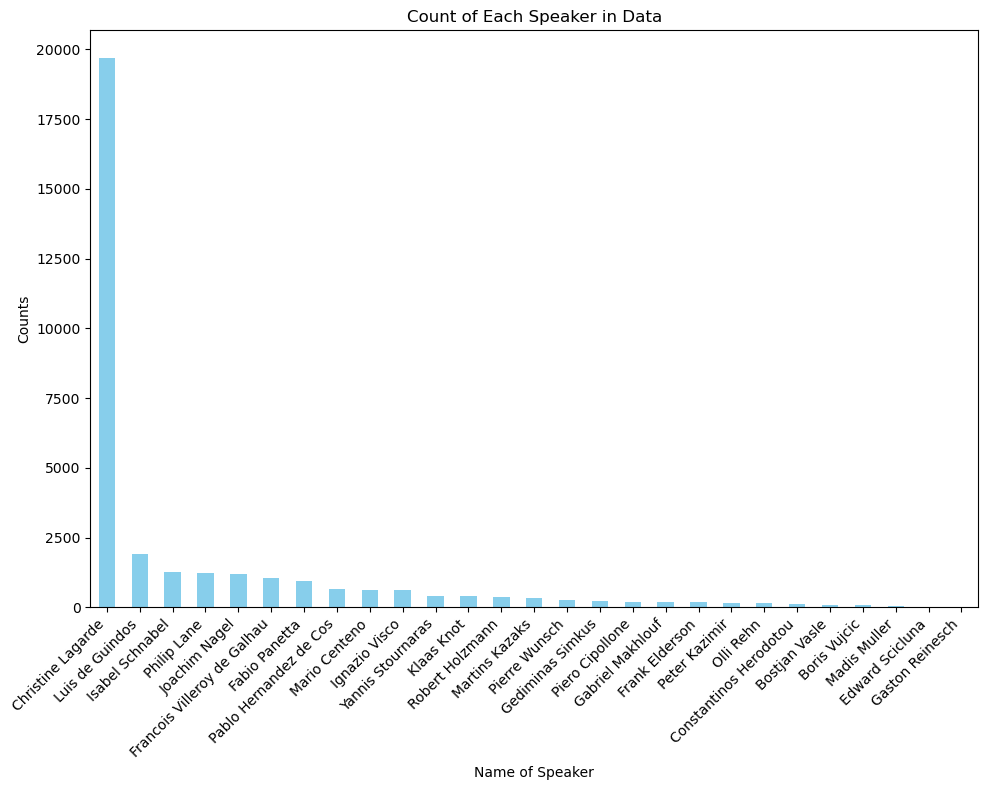

In [ ]:
# Assuming df_scraped is already loaded with data

# Count occurrences of each unique value in 'Name_of_Speaker'
name_counts = df_scraped['Name_of_Speaker'].value_counts()
print(name_counts)


# Plotting the counts
plt.figure(figsize=(10, 8))  # Set the figure size for better readability
name_counts.plot(kind='bar', color='skyblue')  # Create a bar plot
plt.title('Count of Each Speaker in Data')  # Title of the plot
plt.xlabel('Name of Speaker')  # Label for the x-axis
plt.ylabel('Counts')  # Label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust subplots to give some padding
plt.show()  # Display the plot

In [ ]:
df_scraped.to_csv('df_scraped_with_names.csv', index=False)

# Checking the non-check

In [ ]:
df_scraped_2=pd.read_csvgi('df_scraped_with_names.csv')
df_scraped_2.head(20)

,Date,Source,Headline,Translated.headline,Manual.summary,Original.article.url,Translated.text,Media.type,Speaker,Reach,Language,Country.Code,Sitename,Tags,Site_Readership,Article_Readership,translated_text_preproc,manual_summary_preproc,Name_of_Speaker
0,2022-09-30 22:08:34,Il Messaggero - Borsa Italiana,"Visco: «Troppi rialzi dei tassi, si va in recessione. Grave errore seguire la Fed»","Banca d'Italia's Visco: ""Too many rate hikes would trigger a recession. Big mistake to follow the Fed""","At a conference in Florence, Banca d'Italia Governor Ignazio Visco warned of the risks of triggering recession if the ECB blindly follows the US Federal Reserve and proceeds with excessively rapid and pronounced rate rises. Mr Visco, however, defended the ECB from the attacks of those who criticised it as slow in recognising the arrival of high inflation in recent months and stressed that he does not see any apparent reason to assume that the upcoming increases will be extraordinarily high. The governor claimed that the ECB had started its journey last December and emphasised that the institution's neutral policy rate would be between 0.7% and 1.8%. Therefore, the ECB could have already reached this rate with its last interest rate increase or is close to reaching it soon.",https://www.ilmessaggero.it/economia/news/tassi_bce_visco_fed-6960546.html,"No to an excessive rise in rates. The Governor of the Bank of Italy, Vincenzo Visco, warns against rapid and pronounced risks >>. After the hail of declarations from the hawks, the Frankfurt leadership in recent days was slow in recognizing the arrival of high inflation in recent months. And the dust of the hawks' front is soaked in the ECB Council: There is no <<obvious reason why Tying Our Hands With Hypotheses of Extraordinarily High Increases Such as Those We Read in Some Parts. A Speech Made Highlighting the Difference Between Europe and the United States which requires a different normalization path. A similar vision is also expressed by the EU Commissioner for Economic Affairs Paolo Gentiloni who calls for fighting inflation ""without killing growth"". For the board of the central bank, a decision will also be made more difficult by the different pace of inflation in European countries, hidden within 10% of the EU figure. If Germany is at 10%, LANDA at 17% and Italy at 8.9%, in Spain prices are rising and so also in France, at +6.2%. In his speech, the Governor claims that the ECB has made its path neither accommodative nor restrictive and that Frankfurt is trying to achieve so as not to further fan the flames of inflation: 'It would be in a range between 0.7 and no rate hike. , orClose to Be Soon >>. Visco's is a clear stop to colleagues who are asking for new sharp increases in GNI. Decision will be made ""based on data"". In the last two days alone, the governors of Austria, Finland, Lithuania and Latvia had pushed the hawkish front in favor of a 75 basis point squeeze in October. IT'S NOT ONLY GROWTH THAT IS VANTI'S TROUBLE FOR FINANCIAL STABILITY>>, the realization of which would have heavy repercussions in all the countries of the euro area, leading to a tightening of financial conditions far greater than what was considered appropriate to contain the high inflation. ""And also for this reason Italy must not abdicate its virtuous path on which Mario Draghi's government has set out: debt reduction. The message, without naming it, is to the new government. Help to combat the energy shock and the expensive bills are possible but only to the most affected companies and families, otherwise the Count will be paid by future generations with the Greater Kingdom.",WEB,Newspapers,1174293,it,IT,Il Messaggero,"European Central Bank, European Monetary Union and Central Banks, Inflation, Rank 1, Christine Lagarde, Core sources, Mandate (price stability), Interest rates, Growth, Isabel Schnabel, Governing Council members",2296944.0,0.0,excessive rise rate governor bank italy vincenzo visco warns

In [ ]:
# Print the rows which Manual.Summary is Nan or it has less than 10 characters
print(df_scraped_2[(df_scraped_2['manual_summary_preproc'].isnull()) & (df_scraped_2['Name_of_Speaker'].isnull())])
# Count the rows which Manual.Summary is Nan or it has less than 10 characters
print(df_scraped_2[(df_scraped_2['manual_summary_preproc'].isnull()) & (df_scraped_2['Name_of_Speaker'].isnull())].shape[0])


                     Date                             Source  \
5     2022-09-30 19:47:02                      Trend. - Home   
6     2022-09-30 19:17:43  Rai News 24  - Economia e finanza   
12    2022-09-30 18:39:39  Affaritaliani Libero - Notiziario   
31    2022-09-30 13:50:51         Børsen - Pro International   
35    2022-09-30 13:10:39                Investor.Bg - Видео   
...                   ...                                ...   
32972 2023-10-25 10:40:21                   Bloomberg - Asia   
33441 2023-10-16 07:57:00         Børsen - Pro International   
33662 2023-10-12 07:13:45                  Bloomberg - News1   
33947 2023-10-06 15:44:49          Dagens Industri - Nyheter   
33949 2023-10-06 15:42:15                       Puls Biznesu   

                                                                             Headline  \
5                                      EZB-Direktorin Schnabel für "robustes" Handeln   
6      Visco: "Lo shock energetico è un onere ineludi

In [ ]:
#Create a dataframe only with the manual_summary_preproc is null
df_scraped_null = df_scraped_2[(df_scraped_2['manual_summary_preproc'].isnull()) & (df_scraped_2['Name_of_Speaker'].isnull())]
df_scraped_null.head(20)


Date                             Source  \
5   2022-09-30 19:47:02                      Trend. - Home   
6   2022-09-30 19:17:43  Rai News 24  - Economia e finanza   
12  2022-09-30 18:39:39  Affaritaliani Libero - Notiziario   
31  2022-09-30 13:50:51         Børsen - Pro International   
35  2022-09-30 13:10:39                Investor.Bg - Видео   
40  2022-09-30 09:22:50         Børsen - Pro International   
41  2022-09-30 09:22:13              Tgcom24 - Primo piano   
42  2022-09-30 09:19:43                     COPE - Portada   
69  2022-09-30 03:00:00          ZIARUL FINANCIAR, page 10   
95  2022-09-29 20:53:21                   Børsen - Nyheder   
98  2022-09-29 20:08:11           Dinheiro Vivo - Economia   
112 2022-09-29 16:07:38                         Respublika   
114 2022-09-29 15:29:18  FinansWatch.dk - Pengeinstitutter   
123 2022-09-29 14:15:07              Lietuvos Nacionalinis   
135 2022-09-29 12:28:48                Aamulehti - Etusivu   
145 2022-09-29 11:36:36                   Børsen - Nyheder   
149 2022-09-29 11:26:51                Stock Watch  - Home   
154 2022-09-29 10:53:56                    Dagens Industri   
158 2022-09-29 10:36:29                            Tgcom24   
161 2022-09-29 10:20:11    Delfi.lt - Naujausi straipsniai   

                                                                                                                   Headline  \
5                                                                            EZB-Direktorin Schnabel für "robustes" Handeln   
6                                            Visco: "Lo shock energetico è un onere ineludibile. Sbagliato fare più debito"   
12                                            **Conti pubblici: Visco, rientro debito ben indirizzato ma resta necessario**   
31                                                          ECB  Officials Lay Foundation for Significant October Rate Hike   
35                                                                       Сентено:  ЕЦБ  трябва да е премерена и балансирана   
40                                                            French Inflation Unexpectedly Eases as  ECB  Weighs Next Move   
41                                        Totoministri, si lavora alla squadra: nomi e ipotesi | Ma c'è lo scoglio Viminale   
42                   La situación económica y política de España, a debate entre Felipe González y Rajoy en el Foro La Toja   
69                                                 Taxati bogatii pentru a ajuta victimele crizei energetice, indeamna  BCE   
95                                                           ECB-medlem: Når ikke inflation på 2 pct. uden “normal” politik   
98                                                        Euro mantém tendência de subida apoiada em declarações de Lagarde   
112                                                   G. Šimkus: vertėtų svarstyti PVM lengvatas ne tik centriniam šildymui   
114                                                               ECB-medlem vil have flere markante renteløft frem mod jul   
123                                                                 Verslo nuomonės lyderis – Lietuvos banko vadovas Šimkus   
135  Suomen Pankki varoittaa pahenevasta energiakriisistä – Pääjohtaja Rehn vaatii  EU :ta panemaan ”rivinsä järjestykseen”   
145                                                ECB-rådsmedlem: Ser neutral rente til jul ved flere “markante renteløft”   
149                                                         EKT : Η νομισματική και δημοσ. πολιτική πρέπει να συνεργάζονται   
154                                                           ECB : Finanspolitik ska inte stimulera inflation – de guindos   
158                                                      Governo: Meloni punta su Panetta o Siniscalco per Tesoro (CorSera)   
161                                       Nuomonės lyderių topas: infliacijos fone prekybininkai užleido vietą ekonomistams   

                                                

In [ ]:
print(df_scraped_null.shape[0])

1480


In [ ]:
# Print the rows where both 'manual_summary_preproc' and 'Name_of_Speaker' are NaN
print(df_scraped_2[(df_scraped_2['manual_summary_preproc'].isnull()) & (df_scraped_2['Name_of_Speaker'].isnull())])

# Print the total number of rows before removing any
print("Total rows before removing any:", df_scraped_2.shape[0])

# Remove rows where 'manual_summary_preproc' is null or 'Name_of_Speaker' is null
df_scraped_2 = df_scraped_2[~(df_scraped_2['manual_summary_preproc'].isnull() & df_scraped_2['Name_of_Speaker'].isnull())]

# Print the total number of rows after removing rows where 'manual_summary_preproc' or 'Name_of_Speaker' is null
print("Total rows after removing rows with any NaNs in 'manual_summary_preproc' or 'Name_of_Speaker':", df_scraped_2.shape[0])


                     Date                             Source  \
5     2022-09-30 19:47:02                      Trend. - Home   
6     2022-09-30 19:17:43  Rai News 24  - Economia e finanza   
12    2022-09-30 18:39:39  Affaritaliani Libero - Notiziario   
31    2022-09-30 13:50:51         Børsen - Pro International   
35    2022-09-30 13:10:39                Investor.Bg - Видео   
...                   ...                                ...   
32972 2023-10-25 10:40:21                   Bloomberg - Asia   
33441 2023-10-16 07:57:00         Børsen - Pro International   
33662 2023-10-12 07:13:45                  Bloomberg - News1   
33947 2023-10-06 15:44:49          Dagens Industri - Nyheter   
33949 2023-10-06 15:42:15                       Puls Biznesu   

                                                                             Headline  \
5                                      EZB-Direktorin Schnabel für "robustes" Handeln   
6      Visco: "Lo shock energetico è un onere ineludi

In [ ]:
#Check the percentage of null_rows in the 'Name_of_Speaker' column
null_rows = df_scraped[df_scraped['Name_of_Speaker'].isnull()]
count_both_missing = null_rows.shape[0]
total_rows = df_scraped.shape[0]
percentage_both_missing_1 = (count_both_missing / total_rows) * 100

print(f"Number of rows where 'Name_of_Speaker' is null in df_shaped: {count_both_missing}")
print (f"Percentage of total rows where 'Name_of_Speaker' is null in df_shaped: {percentage_both_missing_1:.2f}%")

#Check the percentage of null_rows in the 'Name_of_Speaker' column
null_rows = df_scraped_2[df_scraped_2['Name_of_Speaker'].isnull()]
count_both_missing = null_rows.shape[0]
total_rows = df_scraped_2.shape[0]
percentage_both_missing_2 = (count_both_missing / total_rows) * 100

print(f"Number of rows where 'Name_of_Speaker' is null in df_shaped_2: {count_both_missing}")
print (f"Percentage of total rows where 'Name_of_Speaker' is null in df_shaped_2: {percentage_both_missing_2:.2f}%")

Number of rows where 'Name_of_Speaker' is null in df_shaped: 2648
Percentage of total rows where 'Name_of_Speaker' is null in df_shaped: 7.55%
Number of rows where 'Name_of_Speaker' is null in df_shaped_2: 1168
Percentage of total rows where 'Name_of_Speaker' is null in df_shaped_2: 3.48%


In [ ]:
# Print the percentage of rows where 'Name_of_Speaker' is null
print(f"Percentage of total rows where 'Name_of_Speaker' is null: {percentage_both_missing:.2f}%")
print(f'{count_both_missing} rows where Name_of_Speaker is null')
# Print the total number of rows
print(f"Total number of rows: {total_rows}")



Percentage of total rows where 'Name_of_Speaker' is null: 3.90%
1168 rows where Name_of_Speaker is null
Total number of rows: 33596


## Dealing with no Match that are non-null

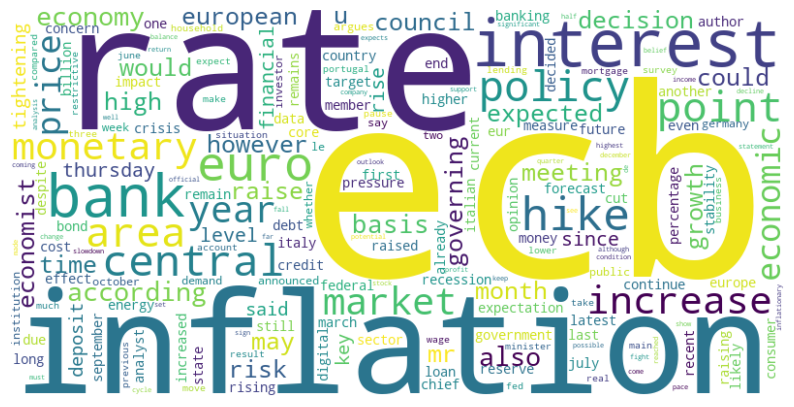

In [ ]:
#Create a dataframe only with the name_of_speaker is null

df_scraped_null = df_scraped_2[df_scraped_2['Name_of_Speaker'].isnull()]

#Do a wordcloud with rows without the 'Name_of_Speaker' column
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# Create a list of words from the 'manual_summary_preproc' column
words = df_scraped_null['manual_summary_preproc'].str.split(expand=True).stack().tolist()

# Create a counter object to count the frequency of each word
word_freq = Counter(words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [ ]:
#Print manual_summary_prepoc from df_scraped_null wide so i can see the full text
pd.set_option('display.max_colwidth', None)

# Print each entry in the 'manual_summary_preproc' column horizontally
for index, text in enumerate(df_scraped_null['manual_summary_preproc'].head(20)):
    print(f"Entry {index+1}: {text}")

Entry 1: context expected basispoint raise ecb rate meeting la bourse au quotidien editorinchief eric lewin say feeling peak euro area inflation may reached another guest programme vega investment manager cio jeanjacques friedman say ecb follows u federal reserve footstep raising rate order curb depreciation euro u dollar belief ecb slow raising rate fed even inflation remains relatively high
Entry 2: four ecb policymakers voiced support another big rate hike thursday case basis point increase october strengthening data showed inflation germany populous state recorded biggest rise decade flash estimate inflation september expected later day analyst expect eu harmonised consumer price hicp risen yearonyear september ecb raised interest rate total basis point last two meeting recent statement suggest ecb intends reach level rapidly little conviction whether depo rate lifted deep restrictive territory unicredit strategist wrote today inflation together appearance ecb representative likely

In [ ]:
# Filter rows where the 'manual_summary_preproc' column contains the word 'governor'
filtered_df = df_scraped_null[df_scraped_null['manual_summary_preproc'].str.contains('governor', case=False, na=False)]

# Print each entry that contains 'governor'
for index, text in enumerate(filtered_df['manual_summary_preproc']):
    print(f"Entry {index+1}: {text}")


Entry 1: interview project syndicate former bank england deputy governor howard davy discus fight inflation central bank response mr davy fear ecb still catching together u federal reserve bank england slow react rising inflation leading cost removing inflation system high also argues central bank open approach pointing sign groupthink among monetary policymakers mr davy belief scale qe financial crisis seen policy mistake highlight unsuccessful uk regulation
Entry 2: ecb expected announce interest rate increase october meeting analyst forecast hike put ecb refinancing rate deposit rate ecb fear current high inflation could become permanently established economy governor agree implement sharp interest rate rise cool demand slow price reinforce ecb credibility moreover ecb may take step make monetary policy le expansionary making change tltro loan incentive early amortisation
Entry 3: latvijas banka released latest forecast main message without structural reform large investment economy

In [ ]:
# Filter rows where the 'manual_summary_preproc' column contains the word 'governor'
filtered_df = df_scraped_null[df_scraped_null['manual_summary_preproc'].str.contains('Boris', case=False, na=False)]

# Print each entry that contains 'governor'
for index, text in enumerate(filtered_df['manual_summary_preproc']):
    print(f"Entry {index+1}: {text}")

In [ ]:
# Filter rows where the 'manual_summary_preproc' column contains the word 'governor'
filtered_df = df_scraped_null[df_scraped_null['manual_summary_preproc'].str.contains('madis', case=False, na=False)]

# Print each entry that contains 'governor'
for index, text in enumerate(filtered_df['manual_summary_preproc']):
    print(f"Entry {index+1}: {text}")

In [ ]:
# Filter rows where the 'manual_summary_preproc' column contains the word 'governor'
filtered_df = df_scraped_null[df_scraped_null['manual_summary_preproc'].str.contains('member', case=False, na=False)]

# Print each entry that contains 'governor'
for index, text in enumerate(filtered_df['manual_summary_preproc']):
    print(f"Entry {index+1}: {text}")

Entry 1: month ago ecb published analysis budgetary impact measure adopted euro area member state deal economic effect invasion ukraine according author calculation tax cut spending increase benefit vulnerable household le directly contribute ecological transition probability compensatory measure extends mean measure altered increase interest rate ecb may particularly painful efficient medicine spiking price since origin overheating european economy measure specifically reform energy price fixation mechanism income pact
Entry 2: capital market important step forward since euro launch first massive launch eurobonds coronavirus pandemic finance fight unemployment sure programme economic restructuring plan ngeu ecb asking see opportunity make security reference asset region absence one element liquidity conclusion one latest study carried member research analysis team central bank stress eurobonds eye investor asset low risk default even though rating agency able agree
Entry 3: ecb govern

In [ ]:
# Filter rows where the 'manual_summary_preproc' column contains the word 'governor'
filtered_df = df_scraped_null[df_scraped_null['manual_summary_preproc'].str.contains('centena', case=False, na=False)]

# Print each entry that contains 'governor'
for index, text in enumerate(filtered_df['manual_summary_preproc']):
    print(f"Entry {index+1}: {text}")

Entry 1: banco de portugal advises people look bank best rate return term deposit banco de portugal governor mrio centena belief wide range product available portuguese banking sector accessible everyone people active seeking better banking product banco de portugal vicegovernor clara raposa urged bank cautious saying abuse interest rate offer order put solvency risk


In [ ]:
# Filter rows where the 'manual_summary_preproc' column contains the word 'governor'
filtered_df = df_scraped_null[df_scraped_null['manual_summary_preproc'].str.contains('governor', case=False, na=False)]

# Print each entry that contains 'governor'
for index, text in enumerate(filtered_df['manual_summary_preproc']):
    print(f"Entry {index+1}: {text}")

In [ ]:
# Filter rows where the 'manual_summary_preproc' column contains the word 'governor'
filtered_df = df_scraped_null[df_scraped_null['manual_summary_preproc'].str.contains('ecb', case=False, na=False)]

# Print each entry that contains 'governor'
for index, text in enumerate(filtered_df['manual_summary_preproc']):
    print(f"Entry {index+1}: {text}")

Entry 1: context expected basispoint raise ecb rate meeting la bourse au quotidien editorinchief eric lewin say feeling peak euro area inflation may reached another guest programme vega investment manager cio jeanjacques friedman say ecb follows u federal reserve footstep raising rate order curb depreciation euro u dollar belief ecb slow raising rate fed even inflation remains relatively high
Entry 2: four ecb policymakers voiced support another big rate hike thursday case basis point increase october strengthening data showed inflation germany populous state recorded biggest rise decade flash estimate inflation september expected later day analyst expect eu harmonised consumer price hicp risen yearonyear september ecb raised interest rate total basis point last two meeting recent statement suggest ecb intends reach level rapidly little conviction whether depo rate lifted deep restrictive territory unicredit strategist wrote today inflation together appearance ecb representative likely

### EDA Governors Analysis

In [ ]:
import plotly.graph_objects as go

#Create the bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=count_df['Governor'],
    y=count_df['Full Name Count (Scraped Text)'],
    name='Full Name Count (Scraped Text)'
))

fig.add_trace(go.Bar(
    x=count_df['Governor'],
    y=count_df['Full Name Count (Manual Summary)'],
    name='Full Name Count (Manual Summary)'
))

# Update the layout
fig.update_layout(
    title='Comparison of Full Name Counts',
    xaxis_title='Governor',
    yaxis_title='Count',
    barmode='group'
)

# Show the figure
fig.show()


In [ ]:

# Function to check for a match with variations
def has_match(text, name_variations):
    for name in name_variations:
        if re.search(rf'\b{name}\b', text, flags=re.IGNORECASE):
            return True
    return False

# Create a function to generate name variations
def generate_name_variations(full_name, first_name, surname):
    variations = [
        full_name,
        first_name,
        surname,
        f"{first_name} {surname}",
        f"{surname} {first_name}",
        full_name.replace(" ", ""),
        first_name.replace(" ", ""),
        surname.replace(" ", ""),
    ]
    return list(set(variations))  # Ensure unique variations

# List of full names and their variations
name_variations_list = [
    generate_name_variations(row['Full Name'], row['First Name'], row['Surname'])
    for index, row in ECB_df.iterrows()
]

# Check for matches in the preprocessed columns and count articles with at least one match
total_articles = len(df_scraped)
full_name_matches_translated = df_scraped['translated_text_preproc'].apply(
    lambda x: any(has_match(x, name_variations) for name_variations in name_variations_list)
).sum()
full_name_matches_manual = df_scraped['manual_summary_preproc'].apply(
    lambda x: any(has_match(x, name_variations) for name_variations in name_variations_list)
).sum()

# Calculate the proportion of articles with full name matches
full_name_proportion_translated = full_name_matches_translated / total_articles
full_name_proportion_manual = full_name_matches_manual / total_articles

print(f"Full Name Match Statistics:")
print(f"Total articles: {total_articles}")
print(f"Articles with full name match (Translated Text): {full_name_matches_translated} ({full_name_proportion_translated:.2%})")
print(f"Articles with full name match (Manual Summary): {full_name_matches_manual} ({full_name_proportion_manual:.2%})")

# Filter articles without full name matches in the manual summary column and ignore blank entries
articles_without_full_name_match_manual = df_scraped[df_scraped['manual_summary_preproc'].apply(
    lambda x: not any(has_match(x, name_variations) for name_variations in name_variations_list) and x.strip() != ''
)]

# Randomly select 10 examples of such articles
examples_without_full_name_match_manual = articles_without_full_name_match_manual.sample(n=10, random_state=1)

# Display the examples with full content in a more readable format
pd.set_option('display.max_colwidth', None)
print("\nExamples of articles without full name match (Manual Summary):")
for i, row in examples_without_full_name_match_manual.iterrows():
    print(f"Article {i+1}:\n{row['manual_summary_preproc']}\n{'='*80}\n")


Full Name Match Statistics:
Total articles: 35076
Articles with full name match (Translated Text): 29326 (83.61%)
Articles with full name match (Manual Summary): 29040 (82.79%)

Examples of articles without full name match (Manual Summary):
Article 23043:
wage growth euro area still rise timeline inflation ease remains uncertain martin kazak member ecb governing council head latvian central bank advises expecting ecb interest rate cut first half despite ecb ten consecutive key interest rate increase aimed reaching inflation target rate hike ruled kazak economist predict interest rate reduction spring june euro area inflation anticipated take additional two year reach despite expectation slowing price pressure quarterly economic growth projection

Article 15142:
year whateverittakes era central bank brought rate zero made yield usd trillion bond ended january read opinion piece rise sight may year bond bank america friday estimated rush buy bond would continue pointing cue invest put u 

In [ ]:
# Function to check for a match
def has_any_match(text, full_names, first_names, surnames):
    for name in full_names + first_names + surnames:
        if re.search(rf'\b{name}\b', text, flags=re.IGNORECASE):
            return True
    return False

# Lists of names
full_names = ECB_df['Full Name'].tolist()
first_names = ECB_df['First Name'].tolist()
surnames = ECB_df['Surname'].tolist()

# Check for matches in the preprocessed columns and count articles with at least one match
total_articles = len(df_scraped)
any_name_matches_translated = df_scraped['translated_text_preproc'].apply(
    lambda x: has_any_match(x, full_names, first_names, surnames)).sum()
any_name_matches_manual = df_scraped['manual_summary_preproc'].apply(
    lambda x: has_any_match(x, full_names, first_names, surnames)).sum()

# Calculate the proportion of articles with any name matches
any_name_proportion_translated = any_name_matches_translated / total_articles
any_name_proportion_manual = any_name_matches_manual / total_articles

print(f"\nFull Names + First Names + Surnames Match Statistics:")
print(f"Total articles: {total_articles}")
print(f"Articles with any name match (Translated Text): {any_name_matches_translated} ({any_name_proportion_translated:.2%})")
print(f"Articles with any name match (Manual Summary): {any_name_matches_manual} ({any_name_proportion_manual:.2%})")

# Filter articles without any name matches in the manual summary column and ignore blank entries
articles_without_any_name_match_manual = df_scraped[df_scraped['manual_summary_preproc'].apply(
    lambda x: not has_any_match(x, full_names, first_names, surnames) and x.strip() != ''
)]

# Randomly select 10 examples of such articles
examples_without_any_name_match_manual = articles_without_any_name_match_manual.sample(n=10, random_state=1)

# Display the examples with full content in a more readable format
pd.set_option('display.max_colwidth', None)
print("\nExamples of articles without any name match (Manual Summary):")
for i, row in examples_without_any_name_match_manual.iterrows():
    print(f"Article {i+1}:\n{row['manual_summary_preproc']}\n{'='*80}\n")



Full Names + First Names + Surnames Match Statistics:
Total articles: 35076
Articles with any name match (Translated Text): 29298 (83.53%)
Articles with any name match (Manual Summary): 29040 (82.79%)

Examples of articles without any name match (Manual Summary):
Article 23043:
wage growth euro area still rise timeline inflation ease remains uncertain martin kazak member ecb governing council head latvian central bank advises expecting ecb interest rate cut first half despite ecb ten consecutive key interest rate increase aimed reaching inflation target rate hike ruled kazak economist predict interest rate reduction spring june euro area inflation anticipated take additional two year reach despite expectation slowing price pressure quarterly economic growth projection

Article 15142:
year whateverittakes era central bank brought rate zero made yield usd trillion bond ended january read opinion piece rise sight may year bond bank america friday estimated rush buy bond would continue po

In [ ]:
ECB_df.columns

Index(['Full Name', 'First Name', 'Surname', 'Country', 'Position',
       'Executive Role'],
      dtype='object')

In [ ]:
# Save the DataFrame to a CSV file
articles_without_any_name_match_manual.to_csv('articles_without_any_name_match.csv', index=False)


### Spacy Analysis Hawkish & Dovish

In [ ]:
# Download the spaCy model (run this command only once)
#!python -m spacy download en_core_web_sm

In [ ]:
import spacy
from collections import Counter
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define expanded dovish and hawkish words
dovish_words = [
    "accommodative", "easing", "expansionary", "stimulus", "lower rates", "dovish", "supportive", "lowering rates",
    "quantitative easing", "QE", "liquidity", "easy money", "softening", "growth", "recovery", "reduce", "lowering",
    "decrease", "supportive measures", "boost", "economic support", "fiscal support", "monetary support", "rate cuts",
    "rate reduction", "interest rate cut", "low interest", "maintaining low rates", "deflationary", "deflation", "aid",
    "bailout", "funding", "cash flow", "intervention", "credit easing", "backstop"
]

hawkish_words = [
    "tightening", "contractionary", "restrictive", "hiking", "raising rates", "hawkish", "higher rates", "inflationary",
    "quantitative tightening", "QT", "interest rate hike", "hard money", "hardening", "inflation", "price stability",
    "curbing", "containing inflation", "reducing inflation", "anti-inflationary", "overheating", "fiscal discipline",
    "monetary tightening", "rate hikes", "rate increase", "interest rate rise", "high interest", "reducing stimulus",
    "economic restraint", "budget cuts", "austerity", "monetary discipline", "tapering", "withdrawal of stimulus",
    "debt control", "fiscal consolidation", "financial tightening"
]

# Custom stop words list
custom_stop_words = list(nlp.Defaults.stop_words.union({
    "rate", "ecb", "bank", "central", "euro", "said", "president", "increase", "inflation", "lagarde",
    "interest", "policy", "monetary", "market", "economy", "price", "point", "year", "high", "area", "christine", "mr", "de", "hike",
    "percent", "billion", "million", "trillion", "europe", "union", "currency", "eurosystem", "system", "committee",
    "board", "member", "members", "meeting", "conference", "discussion", "report", "statement", "notes", "speech",
    "publication", "data", "figures", "information", "details", "analysis", "comments", "comment", "commentary", 
    "remarks", "outlook", "forecast", "projections", "expectations", "view", "views", "opinion", "opinions", "perspective",
    "perspectives", "standpoint", "stance", "position", "positions", "policy", "policies", "approach", "approaches", "strategy",
    "strategies", "framework", "frameworks", "program", "programs", "measures", "measure", "tools", "tool", "instrument",
    "instruments", "mechanism", "mechanisms", "method", "methods", "procedure", "procedures", "process", "processes",
    "implementation", "practice", "practices", "execution", "operation", "operations", "activity", "activities", 
    "function", "functions", "role", "roles", "task", "tasks", "responsibility", "responsibilities", "duty", "duties",
    "obligation", "obligations", "commitment", "commitments", "engagement", "engagements", "undertaking", "undertakings", "according", "time", "according", "level", "council", "financial", "expected", "european"
}))

# Function to extract potential sentiment words using spaCy with progress bar
def extract_potential_words(texts, existing_words, label):
    potential_words = []
    for text in tqdm(texts, desc=f"Processing texts with spaCy for {label}"):
        doc = nlp(text)
        for token in doc:
            if token.is_alpha and token.lemma_ not in existing_words and token.lemma_ not in custom_stop_words and token.pos_ in ['ADJ', 'NOUN', 'VERB']:
                potential_words.append(token.lemma_)
    return Counter(potential_words)

# Combine both preprocessed columns
all_texts = df_scraped['translated_text_preproc'].tolist() + df_scraped['manual_summary_preproc'].tolist()

# Extract potential dovish and hawkish words using spaCy
print("Extracting potential dovish words using spaCy...")
dovish_potential_spacy = extract_potential_words(all_texts, dovish_words + hawkish_words, "dovish")

print("Extracting potential hawkish words using spaCy...")
hawkish_potential_spacy = extract_potential_words(all_texts, hawkish_words + dovish_words, "hawkish")

# Initialize TF-IDF Vectorizer with custom stop words
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, max_features=1000)  # Adjust max_features as needed

# Fit and transform the text data with progress bar
print("Calculating TF-IDF scores...")
tfidf_matrix = vectorizer.fit_transform(tqdm(all_texts, desc="TF-IDF transformation"))

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame with TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Calculate mean TF-IDF scores for each word
mean_tfidf_scores = tfidf_df.mean()

# Filter potential words based on their presence in TF-IDF feature names
filtered_dovish_words = [word for word, count in dovish_potential_spacy.items() if word in feature_names]
filtered_hawkish_words = [word for word, count in hawkish_potential_spacy.items() if word in feature_names]

# Get top N TF-IDF words
top_n = 15  # Update to get top 15 words
print("Selecting top dovish words based on TF-IDF scores...")
top_dovish_tfidf = mean_tfidf_scores[filtered_dovish_words].sort_values(ascending=False).head(top_n)

print("Selecting top hawkish words based on TF-IDF scores...")
top_hawkish_tfidf = mean_tfidf_scores[filtered_hawkish_words].sort_values(ascending=False).head(top_n)

# Display the results
print("Top Dovish Words (with TF-IDF):", top_dovish_tfidf)
print("\nTop Hawkish Words (with TF-IDF):", top_hawkish_tfidf)

Extracting potential dovish words using spaCy...


Processing texts with spaCy for dovish:   2%|▏         | 1200/70152 [00:32<31:33, 36.42it/s] 


KeyboardInterrupt: 

In [ ]:
count_df.head(30)

,Governor,Country,Full Name Count (Scraped Text),First Name Count (Scraped Text),Surname Count (Scraped Text),Full Name Count (Manual Summary),First Name Count (Manual Summary),Surname Count (Manual Summary)
0,Christine Lagarde,France,15483,17556,30279,17033,17139,25630
1,Luis de Guindos,Spain,2135,2639,3773,2369,2410,3989
2,Piero Cipollone,Italy,229,281,452,245,252,361
3,Philip Lane,Republic of Ireland,1649,1986,3519,1664,1735,2727
4,Frank Elderson,Netherlands,143,401,288,167,208,263
5,Isabel Schnabel,Germany,1889,2191,3624,2152,2165,3255
6,Pablo Hernandez de Cos,Spain,0,972,0,0,910,0
7,Joachim Nagel,Germany,2000,2238,3913,2297,2317,3646
8,Pierre Wunsch,Belgium,420,590,786,440,455,724
9,Yannis Stournaras,Greece,436,470,1211,627,637,1094


Now we link the sentiment analysis to each governor

In [ ]:
# Function to count sentiment words
def count_sentiment_words(text, sentiment_words):
    doc = nlp(text)
    count = 0
    for token in doc:
        if token.lemma_ in sentiment_words:
            count += 1
    return count

# Adding dovish and hawkish counts to count_df
for index, row in count_df.iterrows():
    full_name = row['Governor']
    # Filter texts containing the governor's name
    governor_texts_translated = df_scraped[df_scraped['translated_text_preproc'].str.contains(full_name, case=False, na=False)]
    governor_texts_manual = df_scraped[df_scraped['manual_summary_preproc'].str.contains(full_name, case=False, na=False)]

    # Count dovish and hawkish words in the filtered texts
    dovish_count_translated = governor_texts_translated['translated_text_preproc'].progress_apply(lambda x: count_sentiment_words(x, dovish_words)).sum()
    hawkish_count_translated = governor_texts_translated['translated_text_preproc'].progress_apply(lambda x: count_sentiment_words(x, hawkish_words)).sum()
    
    dovish_count_manual = governor_texts_manual['manual_summary_preproc'].progress_apply(lambda x: count_sentiment_words(x, dovish_words)).sum()
    hawkish_count_manual = governor_texts_manual['manual_summary_preproc'].progress_apply(lambda x: count_sentiment_words(x, hawkish_words)).sum()
    
    count_df.at[index, 'Dovish Count (Translated)'] = dovish_count_translated
    count_df.at[index, 'Hawkish Count (Translated)'] = hawkish_count_translated
    count_df.at[index, 'Dovish Count (Manual)'] = dovish_count_manual
    count_df.at[index, 'Hawkish Count (Manual)'] = hawkish_count_manual

# Calculate total sentiment-related words for each governor
count_df['Total Dovish'] = count_df['Dovish Count (Translated)'] + count_df['Dovish Count (Manual)']
count_df['Total Hawkish'] = count_df['Hawkish Count (Translated)'] + count_df['Hawkish Count (Manual)']
count_df['Total Sentiment'] = count_df['Total Dovish'] + count_df['Total Hawkish']

# Calculate the proportion of dovish and hawkish words for each governor
count_df['Dovish Proportion'] = count_df['Total Dovish'] / count_df['Total Sentiment']
count_df['Hawkish Proportion'] = count_df['Total Hawkish'] / count_df['Total Sentiment']

# Calculate the hawkish-to-dovish ratio
count_df['Hawkish/Dovish Ratio'] = count_df['Hawkish Proportion'] / count_df['Dovish Proportion']

# Normalize the hawkish and dovish proportions for comparison
count_df['Dovish Score (Normalized)'] = (count_df['Dovish Proportion'] - count_df['Dovish Proportion'].min()) / (count_df['Dovish Proportion'].max() - count_df['Dovish Proportion'].min())
count_df['Hawkish Score (Normalized)'] = (count_df['Hawkish Proportion'] - count_df['Hawkish Proportion'].min()) / (count_df['Hawkish Proportion'].max() - count_df['Hawkish Proportion'].min())

# Sort by Hawkish/Dovish Ratio in descending order
count_df_sorted = count_df.sort_values(by='Hawkish/Dovish Ratio', ascending=False)

# Display the relevant columns
print(count_df_sorted[['Governor', 'Country', 'Dovish Proportion', 'Hawkish Proportion', 'Hawkish/Dovish Ratio', 'Dovish Score (Normalized)', 'Hawkish Score (Normalized)']])

Processing Texts: 100%|██████████| 27/27 [00:00<00:00, 36.99it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 100%|██████████| 74/74 [00:04<00:00, 15.51it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 100%|██████████| 1952/1952 [00:32<00:00, 60.44it/s]

                       Governor              Country  Dovish Proportion  \
18              Edward Scicluna                Malta           0.193878   
15             Gediminas Simkus            Lithuania           0.194951   
7                 Joachim Nagel              Germany           0.206675   
13              Robert Holzmann              Austria           0.216397   
16                    Olli Rehn              Finland           0.218750   
5               Isabel Schnabel              Germany           0.220562   
3                   Philip Lane  Republic of Ireland           0.223121   
22                   Klaas Knot          Netherlands           0.231697   
24             Gabriel Makhlouf  Republic of Ireland           0.237212   
10                 Boris Vujcic              Croatia           0.240196   
12  Francois Villeroy de Galhau               France           0.250283   
0             Christine Lagarde               France           0.260120   
8                 Pierre 

In [ ]:
count_df_sorted.head(30)

,Governor,Country,Full Name Count (Scraped Text),First Name Count (Scraped Text),Surname Count (Scraped Text),Full Name Count (Manual Summary),First Name Count (Manual Summary),Surname Count (Manual Summary),Dovish Count (Translated),Hawkish Count (Translated),Dovish Count (Manual),Hawkish Count (Manual),Total Dovish,Total Hawkish,Total Sentiment,Dovish Proportion,Hawkish Proportion,Hawkish/Dovish Ratio,Dovish Score (Normalized),Hawkish Score (Normalized)
18,Edward Scicluna,Malta,23,50,48,17,33,32,34.0,119.0,4.0,39.0,38.0,158.0,196.0,0.193878,0.806122,4.157895,0.000000,1.000000
15,Gediminas Simkus,Lithuania,118,333,229,4,348,6,136.0,565.0,3.0,9.0,139.0,574.0,713.0,0.194951,0.805049,4.129496,0.003053,0.996947
7,Joachim Nagel,Germany,2000,2238,3913,2297,2317,3646,2361.0,7866.0,1020.0,5112.0,3381.0,12978.0,16359.0,0.206675,0.793325,3.838509,0.036401,0.963599
13,Robert Holzmann,Austria,725,1025,1342,893,962,1327,727.0,2372.0,371.0,1604.0,1098.0,3976.0,5074.0,0.216397,0.783603,3.621129,0.064054,0.935946
16,Olli Rehn,Finland,282,308,569,236,239,395,237.0,740.0,85.0,410.0,322.0,1150.0,1472.0,0.218750,0.781250,3.571429,0.070745,0.929255
5,Isabel Schnabel,Germany,1889,2191,3624,2152,2165,3255,2723.0,8225.0,1115.0,5338.0,3838.0,13563.0,17401.0,0.220562,0.779438,3.533872,0.075899,0.924101
3,Philip Lane,Republic of Ireland,1649,1986,3519,1664,1735,2727,2247.0,6859.0,814.0,3799.0,3061.0,10658.0,13719.0,0.223121,0.776879,3.481869,0.083179,0.916821
22,Klaas Knot,Netherlands,964,1021,1867,1057,1065,1568,1253.0,3571.0,418.0,1970.0,1671.0,5541.0,7212.0,0.231697,0.768303,3.315978,0.107571,0.892429
24,Gabriel Makhlouf,Republic of Ireland,309,378,686,287,304,491,349.0,1045.0,124.0,476.0,473.0,1521.0,1994.0,0.237212,0.762788,3.215645,0.123256,0.876744
10,Boris Vujcic,Croatia,84,193,140,0,136,1,98.0,310.0,0.0,0.0,98.0,310.0,408.0,0.240196,0.759804,3.163265,0.131745,0.868255


### Loughran McDonald

In [ ]:
import pandas as pd
from tqdm import tqdm
import re

# Load Loughran-McDonald Master Dictionary
file_path = 'Loughran-McDonald_MasterDictionary_1993-2023.csv'
master_dictionary_df = pd.read_csv(file_path)

# Extract sentiment words from the Loughran-McDonald dictionary
negative_words = set(master_dictionary_df[master_dictionary_df['Negative'] > 0]['Word'].str.lower())
positive_words = set(master_dictionary_df[master_dictionary_df['Positive'] > 0]['Word'].str.lower())
uncertainty_words = set(master_dictionary_df[master_dictionary_df['Uncertainty'] > 0]['Word'].str.lower())
litigious_words = set(master_dictionary_df[master_dictionary_df['Litigious'] > 0]['Word'].str.lower())
constraining_words = set(master_dictionary_df[master_dictionary_df['Constraining'] > 0]['Word'].str.lower())

# Function to count sentiment words
def count_sentiment_words(text, sentiment_words):
    words = re.findall(r'\b\w+\b', text.lower())
    count = sum(1 for word in words if word in sentiment_words)
    return count

# Adding Loughran-McDonald sentiment counts to count_df
for index, row in count_df.iterrows():
    full_name = row['Governor']
    # Filter texts containing the governor's name
    governor_texts_translated = df_scraped[df_scraped['translated_text_preproc'].str.contains(full_name, case=False, na=False)]
    governor_texts_manual = df_scraped[df_scraped['manual_summary_preproc'].str.contains(full_name, case=False, na=False)]
    
    # Concatenate all texts for each governor
    all_texts_translated = " ".join(governor_texts_translated['translated_text_preproc'])
    all_texts_manual = " ".join(governor_texts_manual['manual_summary_preproc'])
    
    # Count sentiment words in the concatenated texts
    count_df.at[index, 'LM_Negative_Count'] = count_sentiment_words(all_texts_translated, negative_words) + count_sentiment_words(all_texts_manual, negative_words)
    count_df.at[index, 'LM_Positive_Count'] = count_sentiment_words(all_texts_translated, positive_words) + count_sentiment_words(all_texts_manual, positive_words)
    count_df.at[index, 'LM_Uncertainty_Count'] = count_sentiment_words(all_texts_translated, uncertainty_words) + count_sentiment_words(all_texts_manual, uncertainty_words)
    count_df.at[index, 'LM_Litigious_Count'] = count_sentiment_words(all_texts_translated, litigious_words) + count_sentiment_words(all_texts_manual, litigious_words)
    count_df.at[index, 'LM_Constraining_Count'] = count_sentiment_words(all_texts_translated, constraining_words) + count_sentiment_words(all_texts_manual, constraining_words)

# Calculate total sentiment-related words for each governor
count_df['Total_LM_Sentiment'] = (count_df['LM_Negative_Count'] + count_df['LM_Positive_Count'] +
                                  count_df['LM_Uncertainty_Count'] + count_df['LM_Litigious_Count'] +
                                  count_df['LM_Constraining_Count'])

# Calculate the proportion of each sentiment type for each governor
count_df['LM_Positive_Proportion'] = count_df['LM_Positive_Count'] / count_df['Total_LM_Sentiment']
count_df['LM_Negative_Proportion'] = count_df['LM_Negative_Count'] / count_df['Total_LM_Sentiment']
count_df['LM_Uncertainty_Proportion'] = count_df['LM_Uncertainty_Count'] / count_df['Total_LM_Sentiment']
count_df['LM_Litigious_Proportion'] = count_df['LM_Litigious_Count'] / count_df['Total_LM_Sentiment']
count_df['LM_Constraining_Proportion'] = count_df['LM_Constraining_Count'] / count_df['Total_LM_Sentiment']

# Sort by LM Positive Proportion in descending order, then by LM Negative Proportion in ascending order
count_df_sorted = count_df.sort_values(by=['LM_Positive_Proportion', 'LM_Negative_Proportion'], ascending=[False, True])

# Display the relevant columns
print(count_df_sorted[['Governor', 'Country', 'LM_Positive_Count', 'LM_Negative_Count', 'LM_Uncertainty_Count', 'LM_Litigious_Count', 'LM_Constraining_Count', 'LM_Positive_Proportion', 'LM_Negative_Proportion', 'LM_Uncertainty_Proportion', 'LM_Litigious_Proportion', 'LM_Constraining_Proportion']])


                       Governor              Country  LM_Positive_Count  \
2               Piero Cipollone                Italy              864.0   
11              Gaston Reinesch           Luxembourg               37.0   
23       Constantinos Herodotou               Cyprus              527.0   
6        Pablo Hernandez de Cos                Spain               89.0   
1               Luis de Guindos                Spain             9636.0   
25                Fabio Panetta                Italy             6974.0   
0             Christine Lagarde               France            55928.0   
9             Yannis Stournaras               Greece             1459.0   
17                Mario Centeno             Portugal             1118.0   
10                 Boris Vujcic              Croatia              170.0   
12  Francois Villeroy de Galhau               France             2231.0   
3                   Philip Lane  Republic of Ireland             5280.0   
7                 Joachim

In [ ]:
count_df_sorted.head(30)[['Governor', 'Country', 'LM_Positive_Count', 'LM_Negative_Count', 'LM_Uncertainty_Count', 'LM_Litigious_Count', 'LM_Constraining_Count', 'LM_Positive_Proportion', 'LM_Negative_Proportion', 'LM_Uncertainty_Proportion', 'LM_Litigious_Proportion', 'LM_Constraining_Proportion']]


,Governor,Country,LM_Positive_Count,LM_Negative_Count,LM_Uncertainty_Count,LM_Litigious_Count,LM_Constraining_Count,LM_Positive_Proportion,LM_Negative_Proportion,LM_Uncertainty_Proportion,LM_Litigious_Proportion,LM_Constraining_Proportion
2,Piero Cipollone,Italy,864.0,1092.0,689.0,155.0,264.0,0.281984,0.356397,0.224869,0.050587,0.086162
11,Gaston Reinesch,Luxembourg,37.0,72.0,27.0,29.0,6.0,0.216374,0.421053,0.157895,0.169591,0.035088
23,Constantinos Herodotou,Cyprus,527.0,1147.0,566.0,88.0,121.0,0.215190,0.468354,0.231115,0.035933,0.049408
6,Pablo Hernandez de Cos,Spain,89.0,179.0,98.0,38.0,34.0,0.203196,0.408676,0.223744,0.086758,0.077626
1,Luis de Guindos,Spain,9636.0,24503.0,12567.0,1413.0,2583.0,0.190052,0.483275,0.247860,0.027869,0.050945
25,Fabio Panetta,Italy,6974.0,15752.0,9592.0,2124.0,2950.0,0.186510,0.421267,0.256525,0.056804,0.078894
0,Christine Lagarde,France,55928.0,148400.0,81831.0,9190.0,20923.0,0.176835,0.469216,0.258736,0.029057,0.066155
9,Yannis Stournaras,Greece,1459.0,4139.0,2094.0,195.0,442.0,0.175171,0.496938,0.251411,0.023412,0.053068
17,Mario Centeno,Portugal,1118.0,3215.0,1697.0,206.0,395.0,0.168602,0.484844,0.255919,0.031066,0.059569
10,Boris Vujcic,Croatia,170.0,485.0,289.0,25.0,45.0,0.167653,0.478304,0.285010,0.024655,0.044379
